<a href="https://colab.research.google.com/github/hc0rd31r0/Bootcamp-DataScience-modulo1/blob/main/Bootcamp_Datascience_aula3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Caderno de exploração dos dados do DATASUS, processados a partir de 2008.




---

#**Aula 3** - Manipulação de dados

---



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

pd.options.display.float_format = "{:.2f}".format
sns.set()



---


*Informações obtidas do site TABNET*

Localização: Informações de Saúde TABNET -> Assistência à Saúde -> Dados Consolidados AIH (RD), por local de internação, a partir de 2008 -> Brasil por região e unidade de Federação
Filtros
*   **Linha**: Unidade da Federação
*   **Coluna**: Ano Mês Atendimento
*   **Conteúdo**: Valor Total
*   **Período**: de: Jan-2008 até: Mar-2021

**Nome do arquivo**: /content/drive/MyDrive/databases/A102533189_28_143_208-A.csv

---



In [2]:
dados = pd.read_csv("/content/drive/MyDrive/databases/A102533189_28_143_208-A.csv", engine='python', encoding="ISO-8859-1", skiprows=3, sep=";", skipfooter=12, thousands=".", decimal=",")


In [3]:
# tolist() para permitir que o index seja mutável 
colunas_usaveis = dados.mean().index.tolist()
colunas_usaveis.insert(0,"Unidade da Federação")

In [4]:
usaveis = dados[colunas_usaveis]
# a Unidade da Federação agora é meu índice
usaveis = usaveis.set_index("Unidade da Federação")
usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8327665.97,8431334.62,7251287.20,7490440.60,8957706.45,10993332.84,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,996411254.68
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3276790.55,2985763.71,2939675.20,2672857.33,2940827.86,3914823.86,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,450048530.47
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14965815.90,15982353.42,15166470.82,14815958.58,16379386.07,19625325.21,18433057.47,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1917247936.05
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2740952.07,2478349.44,

In [5]:
usaveis["2019/Ago"].head()

Unidade da Federação
11 Rondônia    8909111.89
12 Acre        2981072.98
13 Amazonas   16493719.52
14 Roraima     3181321.82
15 Pará       36462011.47
Name: 2019/Ago, dtype: float64

In [6]:
usaveis.T.head()

Unidade da Federação,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará,16 Amapá,17 Tocantins,21 Maranhão,22 Piauí,23 Ceará,24 Rio Grande do Norte,25 Paraíba,26 Pernambuco,27 Alagoas,28 Sergipe,29 Bahia,31 Minas Gerais,32 Espírito Santo,33 Rio de Janeiro,35 São Paulo,41 Paraná,42 Santa Catarina,43 Rio Grande do Sul,50 Mato Grosso do Sul,51 Mato Grosso,52 Goiás,53 Distrito Federal
2007/Ago,4209.37,10470.07,35752.72,4785.91,181159.29,33672.74,4113.76,385330.18,220788.25,357904.65,134605.36,97352.78,400640.85,104243.75,27453.63,135146.36,971394.37,57408.11,469469.34,1665349.90,554800.22,693955.05,1049252.33,199556.12,63562.50,179395.82,191951.47
2007/Set,16397.03,14001.71,45570.64,11858.63,433414.74,104822.98,76633.06,1018352.93,353468.67,572356.18,272088.08,368130.43,1088340.42,174024.90,78565.19,448349.75,2861781.50,284224.80,921646.57,4434168.64,1431708.01,1092964.12,3182913.14,573675.41,232444.62,418053.58,769966.25
2007/Out,133645.19,86200.85,416012.30,43852.67,1893197.50,118378.28,343702.61,2277717.78,1078182.68,1865065.71,684678.30,1002088.64,2973553.48,595544.54,122952.94,1382038.11,10018011.35,1152115.25,2994664.57,14577395.84,4630402.44,3562300.82,8571312.11,1069816.66,927219.59,1198730.25,2165619.56
2007/Nov,346912.84,301323.68,2020381.79,369328.51,5105406.44,226661.18,1068685.94,4334468.23,2406035.32,5131814.39,1695824.89,2149873.40,6699828.82,1125396.73,775705.52,3348779.62,21730281.63,2296383.23,7250528.08,35032259.98,11120030.79,7578502.38,16592432.80,1995899.52,1740439.60,2712117.54,3813256.48
2007/Dez,711758.31,769612.36,5949408.99,470676.43,13162823.43,844019.90,3022200.87,8832514.85,4929772.93,10798042.86,4730811.68,5448177.36,16919031.39,2564966.65,2765495.63,11948984.56,43429517.54,5724199.54,13627123.27,76668547.41,28790722.87,14772555.10,30134255.70,4277979.14,5394225.43,9293914.78,7121965.42


In [7]:
# Remover a coluna "Total" pois destrói a plotagem dos nosso gráfico, vamos removê-lo (rodar apenas uma vez)
usaveis = usaveis.drop("Total", axis=1)

In [8]:
usaveis.index

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará',
       '16 Amapá', '17 Tocantins', '21 Maranhão', '22 Piauí', '23 Ceará',
       '24 Rio Grande do Norte', '25 Paraíba', '26 Pernambuco', '27 Alagoas',
       '28 Sergipe', '29 Bahia', '31 Minas Gerais', '32 Espírito Santo',
       '33 Rio de Janeiro', '35 São Paulo', '41 Paraná', '42 Santa Catarina',
       '43 Rio Grande do Sul', '50 Mato Grosso do Sul', '51 Mato Grosso',
       '52 Goiás', '53 Distrito Federal'],
      dtype='object', name='Unidade da Federação')

In [9]:
usaveis.T.columns

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará',
       '16 Amapá', '17 Tocantins', '21 Maranhão', '22 Piauí', '23 Ceará',
       '24 Rio Grande do Norte', '25 Paraíba', '26 Pernambuco', '27 Alagoas',
       '28 Sergipe', '29 Bahia', '31 Minas Gerais', '32 Espírito Santo',
       '33 Rio de Janeiro', '35 São Paulo', '41 Paraná', '42 Santa Catarina',
       '43 Rio Grande do Sul', '50 Mato Grosso do Sul', '51 Mato Grosso',
       '52 Goiás', '53 Distrito Federal'],
      dtype='object', name='Unidade da Federação')

In [10]:
usaveis[:5]

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8327665.97,8431334.62,7251287.20,7490440.60,8957706.45,10993332.84,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3276790.55,2985763.71,2939675.20,2672857.33,2940827.86,3914823.86,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14965815.90,15982353.42,15166470.82,14815958.58,16379386.07,19625325.21,18433057.47,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2688315.70,2740952.07,247

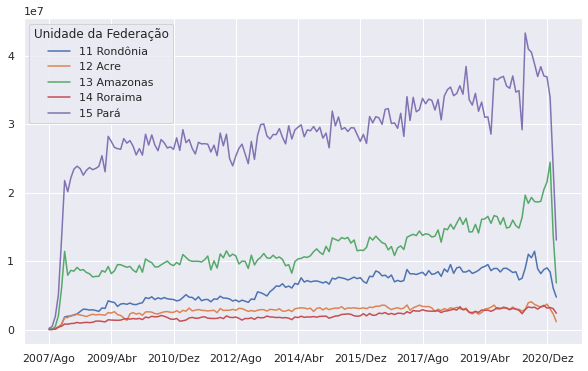

In [11]:
usaveis[:5].T.plot(figsize=(10,6))

In [12]:
# O seed é utilizado para permitir uma aleatoriedade previsível, isso é requerido para testes replicáveis

np.random.seed(687942)
usaveis.sample(n=7)

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
32 Espírito Santo,57408.11,284224.80,1152115.25,2296383.23,5724199.54,16212109.41,10032886.43,12262049.08,12453466.98,11789786.09,11889687.35,12205584.14,12384068.19,12486952.61,12846257.93,12885677.54,12531576.01,13448667.55,11902752.05,14490295.47,14203837.61,15160988.21,14348102.03,15198601.34,15633491.30,14884339.35,14470016.36,14561150.72,13832954.49,14019840.33,13041820.98,16875676.05,15184135.29,15913263.87,15189197.44,15929495.86,17000988.44,16055300.15,16763684.01,16487379.66,...,24276121.39,25480248.19,22686672.67,25266729.61,25975106.39,27444564.56,24444622.13,25716796.37,25498522.61,24338227.14,26158845.99,24671664.41,24683685.86,25201039.31,24710171.75,26740727.97,25983304.03,28690916.87,25936888.97,28550512.79,29318260.49,27519132.91,29788885.15,26294165.36,25250918.87,27615604.26,26601451.82,26689904.87,24003052.09,29290756.45,31958199.08,41931102.65,36405257.36,34491126.71,34800541.67,35708727.33,40500910.57,33767261.13,25669612.63,15606368.11
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,206208080.90,70301089.50,79119005.51,79046322.41,79268070.12,79619189.20,82209206.98,80374117.08,82409129.30,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100258616.86,91831325.37,97289703.07,95723396.53,100050008.70,98977184.26,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100835953.45,105494550.31,99666115.96,103365357.52,107844259.69,104341138.19,100525403.88,101943625.50,...,138366640.55,146510600.58,130734031.29,151506781.86,150702572.27,153604880.55,150262499.13,156721912.31,160484918.69,145998611.06,157294586.62,148172783.99,145422406.28,153236422.57,142690772.52,151976196.81,157957866.20,163641094.76,154174153.49,166775913.85,161774658.77,157437833.94,166165125.18,152171503.07,152473281.15,158265777.55,141463360.42,147654942.70,127447290.37,142746287.34,157276616.50,177466638.10,182176122.99,181422500.43,174585638.28,168564708.16,166376967.67,155064483.25,119877417.15,79780838.00
24 Rio Grande do Norte,134605.36,272088.08,684678.30,1695824.89,4730811.68,11763899.23,9110108.87,10126626.54,10964234.85,11032871.23,10450599.08,11119053.52,10812840.19,11258681.53,10572190.95,10164720.86,10753451.61,10260681.64,10721328.37,12298227.11,11640067.28,12397524.20,12629319.37,13174277.04,12744328.16,13440066.99,13526034.42,13153398.69,12493128.23,12729297.56,11551990.57,15162136.63,13649319.45,14242023.19,12551831.85,13470311.65,14156977.75,13940868.00,13272057.48,13473107.56,...,18118258.43,19045469.42,18254034.58,20972187.31,20717428.90,21991859.64,20909808.17,21544864.14,22634327.48,19926336.21,22290820.67,20445273.59,19382682.35,21161380.30,20770925.83,21775213.78,22206576.63,23819430.58,21613567.61,22137456.57,23073542.40,23438983.02,23086206.33,20354752.02,20140235.98,22205064.78,20518138.12,20939897.73,17722069.48,20430287.05,23027750.86,28608103.39,25721339.11,25098604.18,25257993.78,24312931.74,27277816.41,23228004.80,18186942.80,8733455.36
17 Tocantins,4113.76,76633.06,343702.61,1068685.94,3022200.87,5136474.61,5051932.07,5200151.87,5343714.73,5344487.99,5398413.09,5061461.61,5213290.38,5201400.94,6013071.44,5205114.37,5614918.90,6

In [13]:
usaveis.sum(axis=1)

Unidade da Federação
11 Rondônia                996410650.35
12 Acre                    450047246.65
13 Amazonas               1917245104.64
14 Roraima                 328876551.40
15 Pará                   4705290466.69
16 Amapá                   309837994.87
17 Tocantins              1019990254.88
21 Maranhão               3871010362.58
22 Piauí                  2280874839.37
23 Ceará                  6591825335.83
24 Rio Grande do Norte    2660065804.91
25 Paraíba                2614895825.09
26 Pernambuco             8580915668.43
27 Alagoas                2236401471.26
28 Sergipe                1215843416.10
29 Bahia                  9791496136.10
31 Minas Gerais          20418205467.78
32 Espírito Santo         3405838975.80
33 Rio de Janeiro        10337229379.18
35 São Paulo             41386533231.31
41 Paraná                14681341476.16
42 Santa Catarina         7834872054.38
43 Rio Grande do Sul     12764274442.95
50 Mato Grosso do Sul     2324515373.43
51 Mato Grosso     

In [14]:
usaveis['Total'] = usaveis.sum(axis=1)
usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8327665.97,8431334.62,7251287.20,7490440.60,8957706.45,10993332.84,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,996410650.35
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3276790.55,2985763.71,2939675.20,2672857.33,2940827.86,3914823.86,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,450047246.65
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14965815.90,15982353.42,15166470.82,14815958.58,16379386.07,19625325.21,18433057.47,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1917245104.64
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2740952.07,2478349.44,

In [15]:
ordenado_por_total = usaveis.sort_values("Total", ascending=False)
ordenado_por_total = ordenado_por_total.drop("Total",axis=1)
ordenado_por_total.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1038067423.15,172961999.58,170556696.16,170338163.23,172462057.87,175492995.85,179569910.06,180005050.15,180151656.17,191859884.40,190927266.19,177093923.51,192412059.08,178641284.75,217011730.99,215128107.89,212905217.48,212715455.71,214079357.56,215265625.54,214249871.52,216117145.69,209183971.87,192157037.74,213512793.72,195787926.41,239411372.83,221202929.85,231922777.54,224043808.74,224157730.03,248761855.09,224121038.86,239354185.52,225639053.93,...,259637865.62,279651701.80,254219071.83,285347367.95,286371908.91,291679087.16,279102175.09,286151216.15,295669082.46,277685593.12,302766551.12,278268419.72,266770321.19,291893655.29,268083525.99,287154994.64,292870544.04,309140915.40,281621767.01,307195118.45,303584114.00,294084067.68,303866355.88,282791833.07,273357491.41,303865927.27,272050698.90,277938674.53,255178741.12,314276263.03,328293581.02,361986896.25,350268671.25,338872478.49,328055822.63,324599773.40,326846228.95,324115425.70,268193064.06,177408317.71
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,206208080.90,70301089.50,79119005.51,79046322.41,79268070.12,79619189.20,82209206.98,80374117.08,82409129.30,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100258616.86,91831325.37,97289703.07,95723396.53,100050008.70,98977184.26,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100835953.45,105494550.31,99666115.96,103365357.52,107844259.69,104341138.19,100525403.88,101943625.50,...,138366640.55,146510600.58,130734031.29,151506781.86,150702572.27,153604880.55,150262499.13,156721912.31,160484918.69,145998611.06,157294586.62,148172783.99,145422406.28,153236422.57,142690772.52,151976196.81,157957866.20,163641094.76,154174153.49,166775913.85,161774658.77,157437833.94,166165125.18,152171503.07,152473281.15,158265777.55,141463360.42,147654942.70,127447290.37,142746287.34,157276616.50,177466638.10,182176122.99,181422500.43,174585638.28,168564708.16,166376967.67,155064483.25,119877417.15,79780838.00
41 Paraná,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,58081334.45,48855046.46,55611791.07,56115135.82,55574831.93,56094754.74,59802402.07,56699001.13,58091985.79,61365941.22,59667208.62,57816197.74,60381593.99,57239101.63,69070488.20,64054678.26,68685542.95,67931227.06,70958762.64,69225783.96,67849968.52,68558209.28,67158496.97,63094274.28,66902643.63,64501133.64,77138870.60,70755396.99,73456756.71,71839020.89,73013830.77,76151006.95,74240963.45,73042386.70,76364750.27,...,105558123.29,116133193.49,107075982.24,122331354.51,124731345.17,127083090.02,122616924.02,127991900.80,131257163.40,120647377.43,129530163.96,121810669.26,112984630.73,124159239.68,117715473.32,123907372.22,127464502.39,132608039.80,124865873.14,134708659.18,127174381.95,126203976.57,133870601.68,126221140.81,113573832.72,122330101.96,116125740.39,114776571.27,97784060.57,111012770.38,115203716.64,123856640.55,125089468.62,121771167.11,127506086.52,133443307.36,122146256.92,106948897.53,83130175.37,43480729.07
43 Rio Grande do Sul,1049252.33,3182913.14,8571312.11,16592432.80,30134255.70,51064610.0

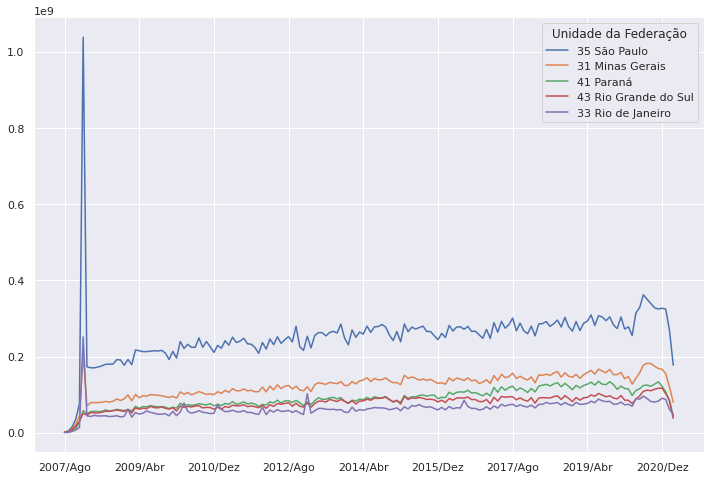

In [16]:
ordenado_por_total.head(5).T.plot(figsize=(12,8))
plt.show()

In [17]:
ordenado_por_total[['2007/Ago','2008/Fev']]

,2007/Ago,2008/Fev
Unidade da Federação,,
35 São Paulo,1665349.90,172961999.58
31 Minas Gerais,971394.37,70301089.50
41 Paraná,554800.22,48855046.46
43 Rio Grande do Sul,1049252.33,45897704.82
33 Rio de Janeiro,469469.34,44128159.73
29 Bahia,135146.36,33410124.06
26 Pernambuco,400640.85,26222079.10
42 Santa Catarina,693955.05,24409572.92
23 Ceará,357904.65,27643304.86


In [18]:
#retiramos as colunas de 2007.
colunas_interessantes = ordenado_por_total.columns[6:]
ordenado_por_total = ordenado_por_total[colunas_interessantes]

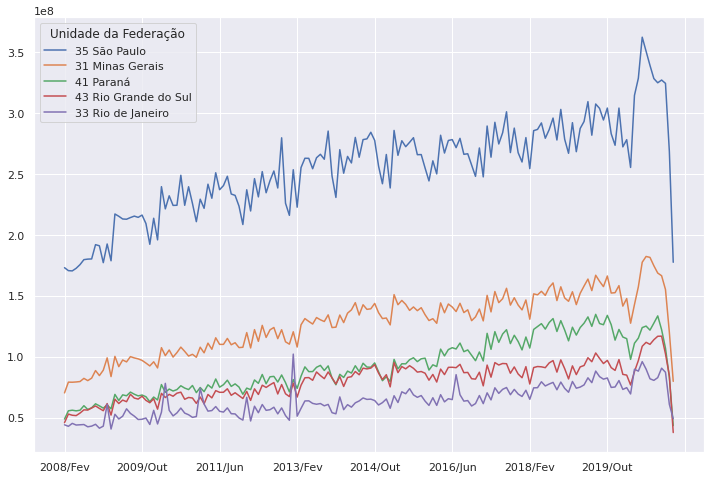

In [19]:
ordenado_por_total.head().T.plot(figsize=(12,8))
plt.show()

## Desafios aula 3

**Desafio 01**: Escolher uma palete de cores mais adequada do matplotlib.

**Desafio 02**: Adicionar uma coluna mostrando a região (Norte, Nodeste, Sul, Suldeste e Centro-Oeste) de cada estado.

**Desafio 03**: Formatar o gráfico de custos por mês dos 5 estados, deixando ele agradável (Bonitão, segundo o Gui)

**Desafio 04**: Adicione o seu estado aos 5 estados plotados anteriormente

**Desafio 05**: Buscar os casos de dengue no Brasil (época de maior número de casos e regiões mais atingidas) e se os picos de alguns estados em fevereiro e verão de modo geral, pode ser reflexos dos casos de dengue

**Desafio 06**: Plotar o gráfico dos custos apenas dos estados da região sudeste e verificar se os picos de 2013/Fev teve comportamento similar em todos os demais estados da região

**Desafio 07**: Adicionar seu estado escolhido novamente, deixe o gráfico informativo e tire conclusões sobre seus estados comparando com os demais. Tire suas conclusões e compartilhe com a gente.



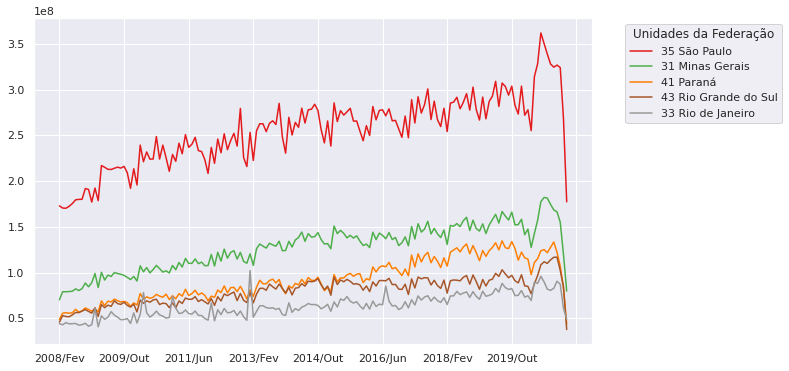

In [20]:
# Desafio 01, vamos utilizar o parâmetro colormap para mudar as cores da legenda

ordenado_por_total.head().T.plot(figsize=(10, 6), colormap = 'Set1')
plt.legend(bbox_to_anchor=(1.05,1), title=('Unidades da Federação'))
plt.show()


In [21]:
# Desafio 02

regions_map = {'1' : 'Norte',
           '2' : 'Nordeste',
           '3' : 'Sudeste',
           '4' : 'Sul',
           '5' : 'Centro-Oeste'}
regions = [regions_map[idx[0]] for idx in usaveis.index]
usaveis.insert(0, 'Região', regions, allow_duplicates=False)
usaveis.head()

,Região,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,Norte,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,...,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8327665.97,8431334.62,7251287.20,7490440.60,8957706.45,10993332.84,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,996410650.35
12 Acre,Norte,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,...,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3276790.55,2985763.71,2939675.20,2672857.33,2940827.86,3914823.86,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,450047246.65
13 Amazonas,Norte,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,...,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14965815.90,15982353.42,15166470.82,14815958.58,16379386.07,19625325.21,18433057.47,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1917245104.64
14 Roraima,Norte,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,...,2740952.07,2478349.44,2674958.94,2721261.19,

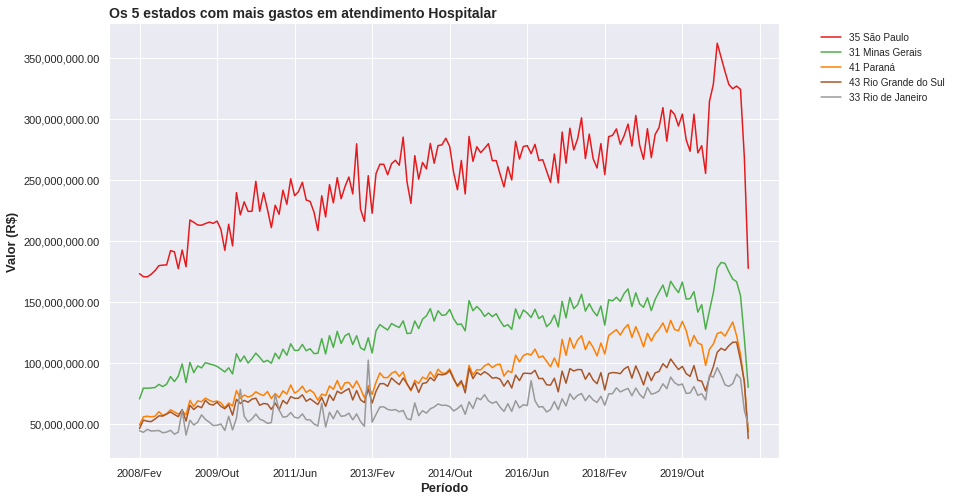

In [22]:
# Desafio 03

ax = ordenado_por_total.head().T.plot(figsize = (12,8), 
                                      xlabel=('Período'),
                                      ylabel=('Valores em Reais (R$)'),
                                      colormap = 'Set1')
plt.style.use('seaborn')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
ax.set_title('Os 5 estados com mais gastos em atendimento Hospitalar', fontsize=14, weight='black', loc='left')
ax.set_xlabel('Período', fontsize=13, weight='black')
ax.set_ylabel('Valor (R$)', fontsize=13, weight='black')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

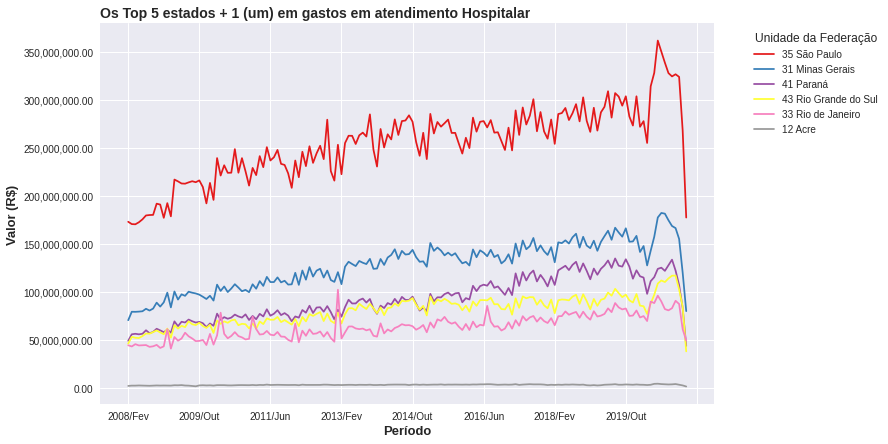

In [23]:
# Desafio 04

top_gastos = ordenado_por_total.head()

# Adicionando o estado do Acre ao gráfico
top_gastos = top_gastos.append(ordenado_por_total.loc['12 Acre'])

ax = top_gastos.head(6).T.plot(figsize = (11,7), 
                                      xlabel=('Período'),
                                      ylabel=('Valores em Reais (R$)'),
                                      colormap = 'Set1')
plt.style.use('seaborn')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
ax.set_title('Os Top 5 estados + 1 (um) em gastos em atendimento Hospitalar', fontsize=14, weight='black', loc='left')
ax.set_xlabel('Período', fontsize=13, weight='black')
ax.set_ylabel('Valor (R$)', fontsize=13, weight='black')
plt.legend(bbox_to_anchor=(1.05, 1), title='Unidade da Federação')
plt.show()

#Dados da Dengue

* Fonte sugerida pelo andre.jarenkow 
* DataSUS específico para [Dengue](http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sinannet/cnv/denguebbr.def)
* Um arquivo por ano (de 2014 a 2020)



Carregar e tratar os arquivos de Dengue
Os arquivos tem nomes semelhantes, alterando apenas o número do ano

In [24]:
# carregar os dados da dengue de 2014 para montar o DataFrame inicial
arquivo = "/content/drive/MyDrive/databases/dengue_2014_A010737189_28_143_208.csv"
dadosano = pd.read_csv(arquivo, engine='python', encoding="ISO-8859-1", skiprows=3, sep=";", skipfooter=19, thousands=".", decimal=",")
dadosano = dadosano.drop('Total', axis=1)
mapa = {'UF de notificação' : 'Unidade da Federação'}
for colname in dadosano.columns[1:]:
    mapa[colname] = '2014/' + colname
dadosano.rename(columns=mapa, inplace=True)

In [25]:
dados_dengue = dadosano
for ano in ['2015','2016','2017','2018','2019','2020']:
    arquivo = "/content/drive/MyDrive/databases/dengue_" + ano + "_A010737189_28_143_208.csv"
    dadosano =  pd.read_csv( arquivo, engine='python', encoding="ISO-8859-1", skiprows=3, sep=";", skipfooter=19, thousands=".", decimal=",")
    dadosano = dadosano.drop('Total', axis=1)
    mapa = {'UF de notificação' : 'Unidade da Federação'}
    for colname in dadosano.columns[1:]:
       mapa[colname] = ano + '/' + colname
    dadosano.rename(columns=mapa, inplace=True)
    dados_dengue = dados_dengue.merge(dadosano, on='Unidade da Federação')

In [26]:
dados_dengue = dados_dengue.replace('-', '0')

In [27]:
#Setar o índice para a Unidade da Federação
dados_dengue = dados_dengue.set_index("Unidade da Federação").rename_axis(None)


In [28]:
# forçando o tipo int64
# método não conheço o .apply
# for colname in dados_dengue.columns[1:]:
#    dados_dengue[colname] = dados_dengue[colname].astype('int64')

# utilizado o .apply
dados_dengue.loc[:,dados_dengue.columns] = dados_dengue.apply(pd.to_numeric)

In [29]:
#Rodar essa linha uma única vez

dados_dengue['Total'] = dados_dengue.sum(axis=1)

In [30]:
# Vamos adicionar a região aos nossos dados
regions_map = {'1' : 'Norte', '2' : 'Nordeste', '3' : 'Sudeste', '4' : 'Sul', '5' : 'Centro-Oeste'}
regions = [regions_map[idx[0]] for idx in dados_dengue.index]
dados_dengue.insert(0, 'Região', regions, allow_duplicates=False)

In [31]:
dados_dengue.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, 11 Rondônia to 53 Distrito Federal
Columns: 86 entries, Região to Total
dtypes: int64(85), object(1)
memory usage: 18.4+ KB


Agora que temos nossa base de dados com as ocorrências de dengue de Jan/2014 até Dez/2020, podemos começar a avaliar se afeta o valor gasto com atendimento Hospitar no período.
Para isso temos que "fatiar" nossa tabela de dados para o mesmo período


In [32]:
# ajustando nossos dados para análise

dados_analise = ordenado_por_total.drop(ordenado_por_total.iloc[:, 0:71], axis = 1)
dados_analise = dados_analise.drop(dados_analise.iloc[:, len(dados_analise.columns)-3:len(dados_analise.columns)], axis = 1)
dados_analise.head()

,2014/Jan,2014/Fev,2014/Mar,2014/Abr,2014/Mai,2014/Jun,2014/Jul,2014/Ago,2014/Set,2014/Out,2014/Nov,2014/Dez,2015/Jan,2015/Fev,2015/Mar,2015/Abr,2015/Mai,2015/Jun,2015/Jul,2015/Ago,2015/Set,2015/Out,2015/Nov,2015/Dez,2016/Jan,2016/Fev,2016/Mar,2016/Abr,2016/Mai,2016/Jun,2016/Jul,2016/Ago,2016/Set,2016/Out,2016/Nov,2016/Dez,2017/Jan,2017/Fev,2017/Mar,2017/Abr,...,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,269752317.25,250448003.40,264215768.43,258867002.33,279787655.03,263541265.43,278009288.23,278606605.29,284017630.88,277330074.58,256259682.61,241807778.48,265797745.25,238347041.81,285514599.89,265097714.76,277066870.17,272196852.96,275770504.82,279572283.22,265632064.76,265725078.34,254660523.65,244119711.69,260610364.26,249859379.98,281580437.68,266992045.12,277290857.99,278007885.46,271417652.20,279039004.42,265942509.91,266393924.39,257237260.36,247864272.82,271136998.70,247427265.11,289142184.83,263582059.95,...,267354892.42,287435651.36,267262034.09,259637865.62,279651701.80,254219071.83,285347367.95,286371908.91,291679087.16,279102175.09,286151216.15,295669082.46,277685593.12,302766551.12,278268419.72,266770321.19,291893655.29,268083525.99,287154994.64,292870544.04,309140915.40,281621767.01,307195118.45,303584114.00,294084067.68,303866355.88,282791833.07,273357491.41,303865927.27,272050698.90,277938674.53,255178741.12,314276263.03,328293581.02,361986896.25,350268671.25,338872478.49,328055822.63,324599773.40,326846228.95
31 Minas Gerais,134156154.80,127951654.33,135692214.91,138386168.54,144303552.86,134143143.46,142596691.51,138799561.34,139266407.72,143694058.81,136080717.06,131250331.04,131695638.74,126060674.04,150875041.27,142606784.74,146104517.61,142895530.96,137939925.52,140776921.48,137733786.02,140162221.98,134382139.41,129647523.62,131130880.47,127373192.23,144115659.56,136015892.70,143193474.25,140730742.09,137010756.09,143770349.05,136162888.49,138419718.77,129528892.52,132628617.72,139068519.49,129340908.71,150297890.74,136724081.95,...,142294086.35,148327161.77,142323944.76,138366640.55,146510600.58,130734031.29,151506781.86,150702572.27,153604880.55,150262499.13,156721912.31,160484918.69,145998611.06,157294586.62,148172783.99,145422406.28,153236422.57,142690772.52,151976196.81,157957866.20,163641094.76,154174153.49,166775913.85,161774658.77,157437833.94,166165125.18,152171503.07,152473281.15,158265777.55,141463360.42,147654942.70,127447290.37,142746287.34,157276616.50,177466638.10,182176122.99,181422500.43,174585638.28,168564708.16,166376967.67
41 Paraná,85535913.11,82974333.96,88169286.83,86571334.03,92568324.61,87767355.12,94614066.92,91494121.19,91343045.75,94904373.35,87565870.66,80303279.43,83539116.38,79573523.24,97763853.10,89990188.75,94201517.78,94110693.24,97516822.03,99118332.19,95940894.73,98263485.47,98791984.50,88996075.82,93324149.08,91925876.55,106199139.20,100621969.13,105829987.44,107370488.61,106314963.74,111180454.75,104105124.15,105530148.67,101123001.43,96708761.10,103855271.30,96464284.10,119141493.81,106027687.78,...,110720806.09,117567691.91,112457522.94,105558123.29,116133193.49,107075982.24,122331354.51,124731345.17,127083090.02,122616924.02,127991900.80,131257163.40,120647377.43,129530163.96,121810669.26,112984630.73,124159239.68,117715473.32,123907372.22,127464502.39,132608039.80,124865873.14,134708659.18,127174381.95,126203976.57,133870601.68,126221140.81,113573832.72,122330101.96,116125740.39,114776571.27,97784060.57,111012770.38,115203716.64,123856640.55,125089468.62,121771167.11,127506086.52,133443307.36,122146256.92
43 Rio Grande do Sul,83655725.6

In [33]:
# Vamos adicionar a região aos nossos dados_analise

regions_map = {'1' : 'Norte', '2' : 'Nordeste', '3' : 'Sudeste', '4' : 'Sul', '5' : 'Centro-Oeste'}
regions = [regions_map[idx[0]] for idx in dados_analise.index]
dados_analise.insert(0, 'Região', regions, allow_duplicates=False)

In [34]:
#Rodar essa linha uma única vez - Adicionar a coluna de Total
dados_analise['Total'] = dados_analise.sum(axis=1)

In [35]:
dados_analise.head()

,Região,2014/Jan,2014/Fev,2014/Mar,2014/Abr,2014/Mai,2014/Jun,2014/Jul,2014/Ago,2014/Set,2014/Out,2014/Nov,2014/Dez,2015/Jan,2015/Fev,2015/Mar,2015/Abr,2015/Mai,2015/Jun,2015/Jul,2015/Ago,2015/Set,2015/Out,2015/Nov,2015/Dez,2016/Jan,2016/Fev,2016/Mar,2016/Abr,2016/Mai,2016/Jun,2016/Jul,2016/Ago,2016/Set,2016/Out,2016/Nov,2016/Dez,2017/Jan,2017/Fev,2017/Mar,...,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,Sudeste,269752317.25,250448003.40,264215768.43,258867002.33,279787655.03,263541265.43,278009288.23,278606605.29,284017630.88,277330074.58,256259682.61,241807778.48,265797745.25,238347041.81,285514599.89,265097714.76,277066870.17,272196852.96,275770504.82,279572283.22,265632064.76,265725078.34,254660523.65,244119711.69,260610364.26,249859379.98,281580437.68,266992045.12,277290857.99,278007885.46,271417652.20,279039004.42,265942509.91,266393924.39,257237260.36,247864272.82,271136998.70,247427265.11,289142184.83,...,287435651.36,267262034.09,259637865.62,279651701.80,254219071.83,285347367.95,286371908.91,291679087.16,279102175.09,286151216.15,295669082.46,277685593.12,302766551.12,278268419.72,266770321.19,291893655.29,268083525.99,287154994.64,292870544.04,309140915.40,281621767.01,307195118.45,303584114.00,294084067.68,303866355.88,282791833.07,273357491.41,303865927.27,272050698.90,277938674.53,255178741.12,314276263.03,328293581.02,361986896.25,350268671.25,338872478.49,328055822.63,324599773.40,326846228.95,23559996650.69
31 Minas Gerais,Sudeste,134156154.80,127951654.33,135692214.91,138386168.54,144303552.86,134143143.46,142596691.51,138799561.34,139266407.72,143694058.81,136080717.06,131250331.04,131695638.74,126060674.04,150875041.27,142606784.74,146104517.61,142895530.96,137939925.52,140776921.48,137733786.02,140162221.98,134382139.41,129647523.62,131130880.47,127373192.23,144115659.56,136015892.70,143193474.25,140730742.09,137010756.09,143770349.05,136162888.49,138419718.77,129528892.52,132628617.72,139068519.49,129340908.71,150297890.74,...,148327161.77,142323944.76,138366640.55,146510600.58,130734031.29,151506781.86,150702572.27,153604880.55,150262499.13,156721912.31,160484918.69,145998611.06,157294586.62,148172783.99,145422406.28,153236422.57,142690772.52,151976196.81,157957866.20,163641094.76,154174153.49,166775913.85,161774658.77,157437833.94,166165125.18,152171503.07,152473281.15,158265777.55,141463360.42,147654942.70,127447290.37,142746287.34,157276616.50,177466638.10,182176122.99,181422500.43,174585638.28,168564708.16,166376967.67,12278735586.84
41 Paraná,Sul,85535913.11,82974333.96,88169286.83,86571334.03,92568324.61,87767355.12,94614066.92,91494121.19,91343045.75,94904373.35,87565870.66,80303279.43,83539116.38,79573523.24,97763853.10,89990188.75,94201517.78,94110693.24,97516822.03,99118332.19,95940894.73,98263485.47,98791984.50,88996075.82,93324149.08,91925876.55,106199139.20,100621969.13,105829987.44,107370488.61,106314963.74,111180454.75,104105124.15,105530148.67,101123001.43,96708761.10,103855271.30,96464284.10,119141493.81,...,117567691.91,112457522.94,105558123.29,116133193.49,107075982.24,122331354.51,124731345.17,127083090.02,122616924.02,127991900.80,131257163.40,120647377.43,129530163.96,121810669.26,112984630.73,124159239.68,117715473.32,123907372.22,127464502.39,132608039.80,124865873.14,134708659.18,127174381.95,126203976.57,133870601.68,126221140.81,113573832.72,122330101.96,116125740.39,114776571.27,97784060.57,111012770.38,115203716.64,123856640.55,125089468.62,121771167.11,127506086.52,133443307.36,122146256.92,9164331096.01
43 Rio Grande do Sul,Sul,83655725.66,75584443.38,8

In [36]:
dados_dengue.head()

,Região,2014/Jan,2014/Fev,2014/Mar,2014/Abr,2014/Mai,2014/Jun,2014/Jul,2014/Ago,2014/Set,2014/Out,2014/Nov,2014/Dez,2015/Jan,2015/Fev,2015/Mar,2015/Abr,2015/Mai,2015/Jun,2015/Jul,2015/Ago,2015/Set,2015/Out,2015/Nov,2015/Dez,2016/Jan,2016/Fev,2016/Mar,2016/Abr,2016/Mai,2016/Jun,2016/Jul,2016/Ago,2016/Set,2016/Out,2016/Nov,2016/Dez,2017/Jan,2017/Fev,2017/Mar,...,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,Total
11 Rondônia,Norte,200,245,257,177,182,136,82,68,53,117,307,197,153,179,269,285,192,129,90,50,62,139,188,514,1714,2273,1720,842,291,115,112,30,40,43,155,574,583,511,427,...,43,77,94,94,78,46,61,68,29,30,27,17,36,34,19,32,43,50,89,65,85,130,80,25,65,114,205,342,632,774,671,530,286,216,119,44,44,98,192,19844
12 Acre,Norte,330,129,205,293,436,432,611,1679,7091,8058,5628,3765,2333,1451,916,323,219,173,83,41,63,67,71,149,326,779,377,228,107,69,68,46,43,42,64,101,288,252,215,...,113,214,338,493,408,394,317,326,202,186,223,434,1162,1832,1306,1710,1219,866,496,318,157,137,174,145,598,2014,2265,2514,978,470,221,582,372,181,124,112,176,668,1876,64336
13 Amazonas,Norte,933,980,1098,1087,573,357,251,228,197,135,228,292,389,421,593,461,366,285,216,182,169,169,123,287,423,914,1328,1704,998,773,384,228,163,175,221,195,504,597,592,...,151,135,145,258,265,331,309,220,187,173,164,121,119,95,83,221,207,151,136,128,97,57,47,101,464,908,1356,1449,731,914,416,343,372,232,147,210,293,442,771,33943
14 Roraima,Norte,83,50,63,71,93,128,124,142,126,95,66,99,87,62,67,93,100,135,147,184,156,41,12,24,11,14,49,10,9,8,15,35,25,15,11,8,14,9,33,...,9,7,6,1,0,2,1,2,5,14,28,10,23,12,13,31,27,58,55,74,59,54,76,156,250,439,312,201,232,57,13,4,3,15,12,11,6,7,23,5028
15 Pará,Norte,538,645,692,616,494,255,196,157,212,293,220,253,309,580,1279,984,936,627,426,556,500,419,445,794,1258,2188,2114,1714,1108,517,401,346,262,287,267,409,1670,2157,1576,...,197,192,186,262,412,739,650,440,251,135,257,152,101,150,226,532,820,770,753,724,363,207,225,270,252,284,180,640,860,741,424,353,175,94,91,67,57,115,136,44031


In [37]:
if dados_dengue.shape == dados_analise.shape:
    print('Os dataframes já estão comparáveis!')
else:
    print('Os dataframes ainda não estão comparáveis.')

Os dataframes já estão comparáveis!


In [38]:
# Top 5 Estados em casos de dengue
dados_dengue.sort_values("Total", ascending=False).head()

,Região,2014/Jan,2014/Fev,2014/Mar,2014/Abr,2014/Mai,2014/Jun,2014/Jul,2014/Ago,2014/Set,2014/Out,2014/Nov,2014/Dez,2015/Jan,2015/Fev,2015/Mar,2015/Abr,2015/Mai,2015/Jun,2015/Jul,2015/Ago,2015/Set,2015/Out,2015/Nov,2015/Dez,2016/Jan,2016/Fev,2016/Mar,2016/Abr,2016/Mai,2016/Jun,2016/Jul,2016/Ago,2016/Set,2016/Out,2016/Nov,2016/Dez,2017/Jan,2017/Fev,2017/Mar,...,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,Total
35 São Paulo,Sudeste,2894,10202,29645,85755,62905,17706,5264,1967,1629,1969,2503,5057,35400,110187,246752,205723,101232,24728,5881,2712,1769,2044,3754,9761,31429,52475,56623,38741,15159,3030,1101,608,551,786,1123,1129,965,1036,1192,...,989,941,965,1168,1269,1971,2388,2324,1134,793,577,438,780,1615,3871,20439,46577,64478,111897,122108,42851,13677,4490,2842,3132,4293,7020,32745,58140,49764,32359,17710,6935,3498,1833,1590,1541,1736,3804,1863440
31 Minas Gerais,Sudeste,4360,8455,10238,15482,10455,4296,1311,593,627,707,851,1115,4636,8130,25919,56024,56343,17642,4218,1633,1143,1285,3392,13075,50392,128387,163455,125300,45594,8562,1742,1033,797,870,1124,1766,4110,4457,5432,...,640,689,1025,1924,2207,4095,7343,4572,1869,877,555,501,785,1348,3099,13904,31502,68678,142536,156645,46356,9389,2188,1966,1580,1410,2313,7289,12155,17229,18740,12648,5527,2840,1506,1487,1383,1995,2654,1400513
52 Goiás,Centro-Oeste,8614,12127,12586,16098,16367,8993,3862,2568,2072,2638,3112,4404,11488,19328,31808,29494,34200,18285,6147,3110,1834,2285,3705,7350,16195,29941,32389,22278,10938,4481,1879,1634,1622,2056,2651,3389,5239,6321,9647,...,2022,1968,1831,7561,10563,15106,16848,15685,7158,2966,2343,1870,2740,3762,4943,8656,11852,16680,22916,25538,14360,5878,2987,2569,2824,2877,3327,6137,8671,11128,10342,7557,5909,3902,1844,1128,924,1160,1360,728067
41 Paraná,Sul,1448,2826,4568,6340,4571,971,530,360,230,314,312,394,1375,3155,11274,15825,7267,2510,623,375,260,307,732,2266,8281,16401,19237,14315,2784,405,215,134,141,239,355,330,376,309,256,...,173,191,209,170,161,126,256,191,66,69,35,32,103,71,144,450,1358,3663,8987,13183,5057,1830,595,466,840,2514,6089,27502,66363,79684,50068,22439,9226,3284,782,656,938,1962,4157,447414
29 Bahia,Nordeste,817,1019,1449,2840,2552,1472,953,689,651,627,465,469,878,2410,9663,10193,8383,5338,4835,2954,2353,1631,2382,4572,6888,20497,20898,8951,3882,1706,911,735,582,745,824,1175,2102,1566,1410,...,346,282,316,607,609,1060,1707,1787,920,539,511,347,444,596,606,2335,4624,5275,8386,14730,10179,7862,4935,3405,2680,2167,1537,2773,5664,10410,17439,20032,14371,6845,2193,1209,922,779,831,308803


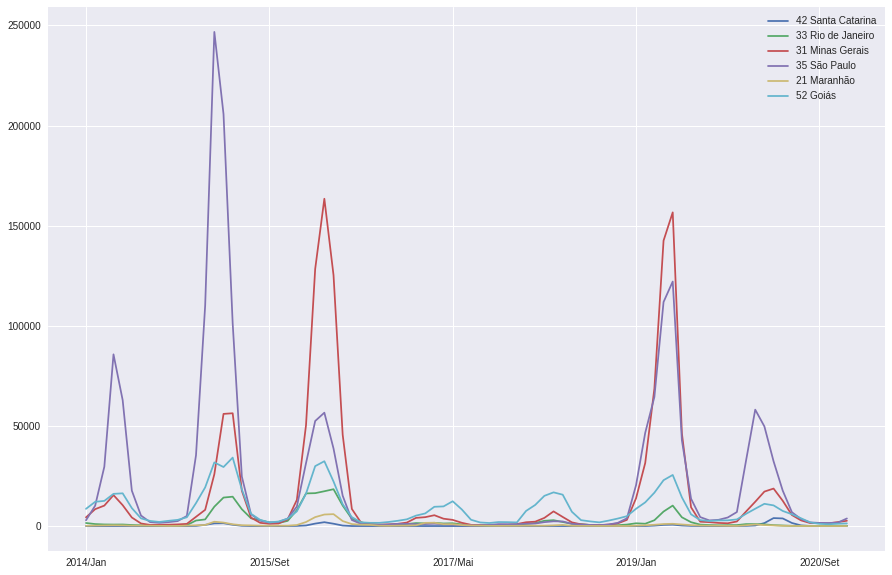

In [39]:
# Estados aleatórios em casos de Dengue
dados_dengue.drop(['Total', 'Região'], axis = 1).sample(6).T.plot(figsize = (15, 10))

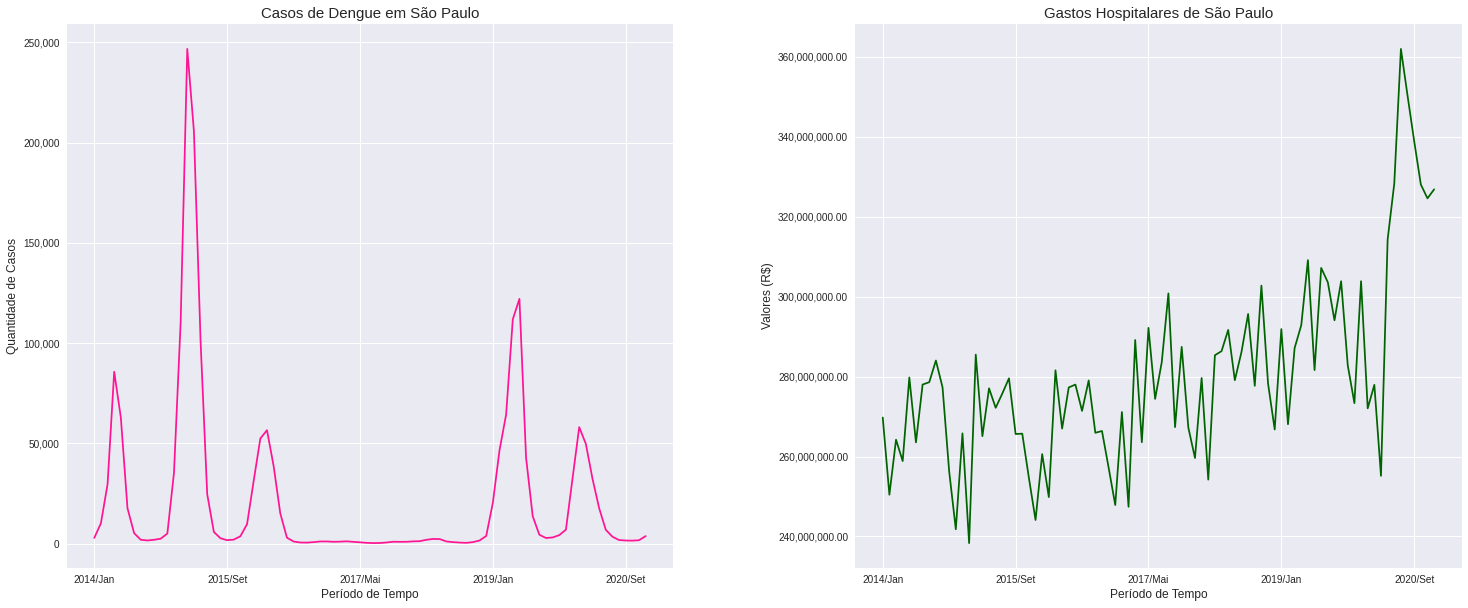

In [40]:
fig, axes = plt.subplots(1, 2, sharex = False, sharey = False, figsize = (25, 10))

plt.subplots_adjust(wspace = 0.3)

dados_dengue.drop(['Total', 'Região'], axis = 1).loc['35 São Paulo'].T.plot(ax = axes[0], color = 'deeppink')

axes[0].set_title('Casos de Dengue em São Paulo', fontsize = 15)
axes[0].set_xlabel('Período de Tempo', fontdict = {'fontsize': 12})
axes[0].set_ylabel('Quantidade de Casos', fontdict = {'fontsize': 12})
axes[0].yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

dados_analise.drop(['Total', 'Região'], axis = 1).loc['35 São Paulo'].T.plot(ax = axes[1], color = 'darkgreen')
axes[1].set_title('Gastos Hospitalares de São Paulo', fontsize = 15)
axes[1].set_xlabel('Período de Tempo', fontdict = {'fontsize': 12})
axes[1].set_ylabel('Valores (R$)', fontdict = {'fontsize': 12})

axes[1].yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

plt.show()

Não foi possível concluir que a quantidade de casos de dengue em São Paulo afetou os gastos com Saúde. Nos picos do 1º semestre de 2015 e no 1º semestre de 2019 apontado no gráfico de casos de dengue não houve uma mudança significativa no gráfico de Gastos Hospitalares.

#Desafio 06 e 07

In [41]:
# Vamos adicionar a região aos nossos dados_analise

regions_map = {'1' : 'Norte', '2' : 'Nordeste', '3' : 'Sudeste', '4' : 'Sul', '5' : 'Centro-Oeste'}
regions = [regions_map[idx[0]] for idx in ordenado_por_total.index]
ordenado_por_total.insert(0, 'Região', regions, allow_duplicates=False)


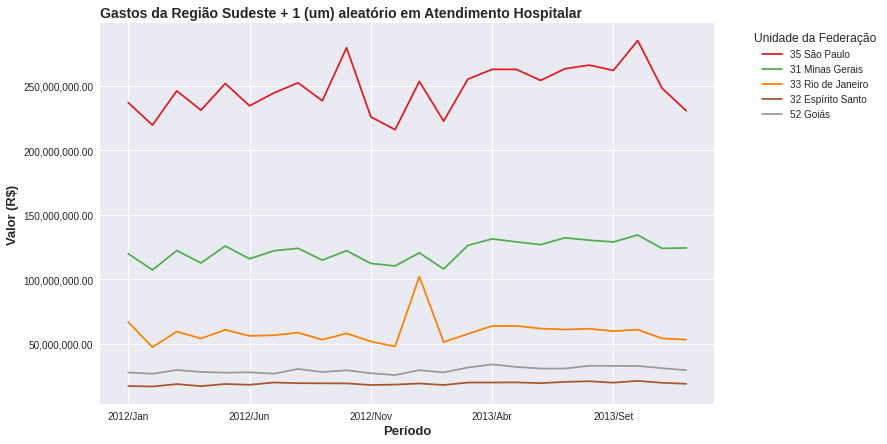

In [42]:
# Desafio 06 e 07

dados_sudeste = ordenado_por_total.query('Região == "Sudeste"')
colunas_2012_2013 = ordenado_por_total.columns[48:72]
dados_sudeste_comparar = dados_sudeste[colunas_2012_2013]

# Tiro a região Sudeste do DataFrame para evitar que o estado se repita 
sudeste_mais_um = dados_sudeste_comparar.append(ordenado_por_total.query('Região != "Sudeste"').sample(n=1)[colunas_2012_2013])

ax = sudeste_mais_um.T.plot(figsize = (11,7), 
                   xlabel=('Período'),
                   ylabel=('Valores em Reais (R$)'),
                   colormap = 'Set1')
plt.style.use('seaborn')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
ax.set_title('Gastos da Região Sudeste + 1 (um) aleatório em Atendimento Hospitalar', fontsize=14, weight='black', loc='left')
ax.set_xlabel('Período', fontsize=13, weight='black')
ax.set_ylabel('Valor (R$)', fontsize=13, weight='black')
plt.legend(bbox_to_anchor=(1.05, 1), title='Unidade da Federação')
plt.show()